# Project: Tipping Behavior Analysis (Tips Dataset)

Objective:
Analyze patterns in tipping behavior to understand:
- Which factors influence tip percentage
- How tipping varies across customer groups
- Where the strongest behavioral signals exist

Dataset: Seaborn "tips"


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips["tip_pct"] = tips["tip"] / tips["total_bill"] * 100
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Tip percentage is the real feature.
Total tip is useless without context.

This is the difference between:

Analysis (normalized feature)

Amateur plotting (raw values)

Step 3 — Key Statistical Summary

In [2]:
tips.describe(include="all")


,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000000,244.000000,244,244,244,244,244.000000,244.000000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,16.080258
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,6.107220
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,3.563814
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,12.912736
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,15.476977
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,19.147549


Interpret this:

Which variable has highest variance?

Which categorical groups are imbalanced?

Are there obvious outliers?



Step 4 — Distribution of Tip Percentage

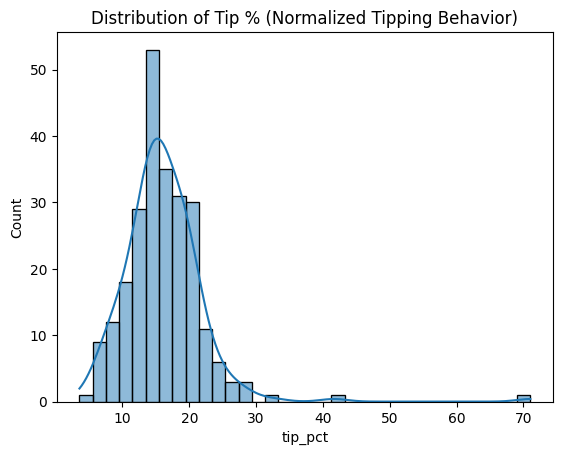

In [5]:
sns.histplot(tips["tip_pct"], kde=True)
plt.title("Distribution of Tip % (Normalized Tipping Behavior)")
plt.show()


Step 5 — Tipping vs Total Bill (Relationship)

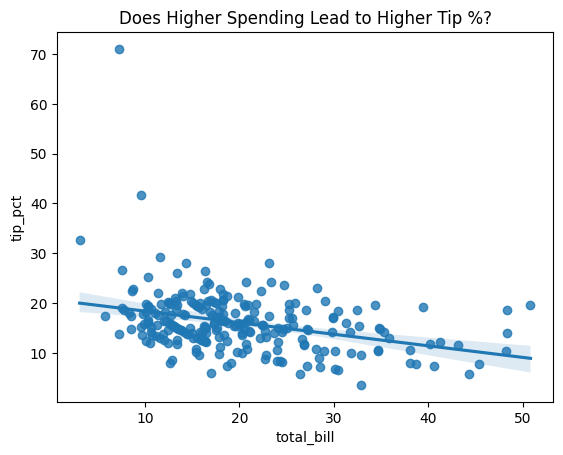

In [6]:
sns.regplot(data=tips, x="total_bill", y="tip_pct")
plt.title("Does Higher Spending Lead to Higher Tip %?")
plt.show()


Interpret:

If slope is flat → bigger bills do not cause higher tipping generosity.

This is a known real-world result.

Step 6 — Category Comparisons (Core Business Insight)

Tip % by Day

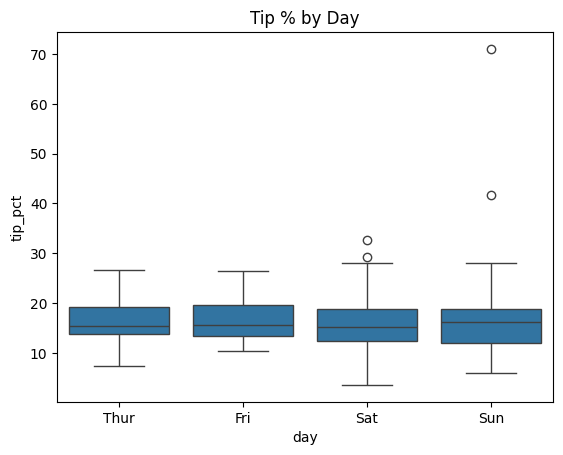

In [7]:
sns.boxplot(data=tips, x="day", y="tip_pct")
plt.title("Tip % by Day")
plt.show()


Tip % by Meal Time

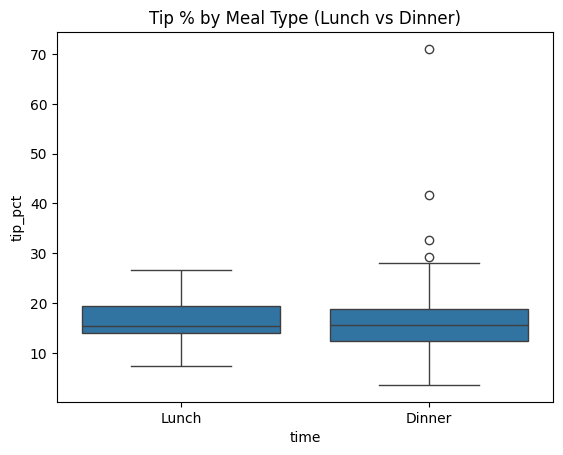

In [8]:
sns.boxplot(data=tips, x="time", y="tip_pct")
plt.title("Tip % by Meal Type (Lunch vs Dinner)")
plt.show()


Tip % by Smoking Status

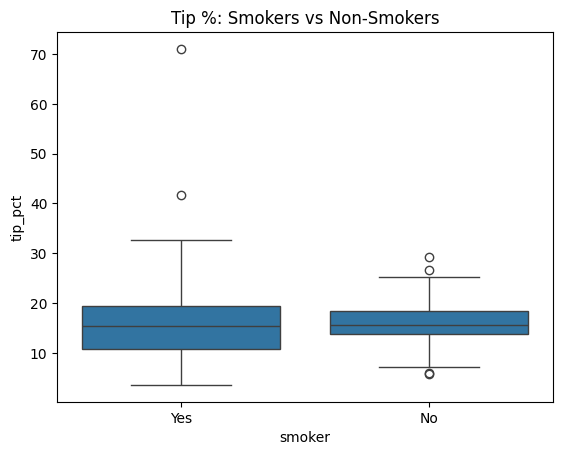

In [9]:
sns.boxplot(data=tips, x="smoker", y="tip_pct")
plt.title("Tip %: Smokers vs Non-Smokers")
plt.show()


Step 7 — Multivariate (The Real Signal Extraction)

Text(0.5, 1.0, 'Tip % by Day Split by Sex')

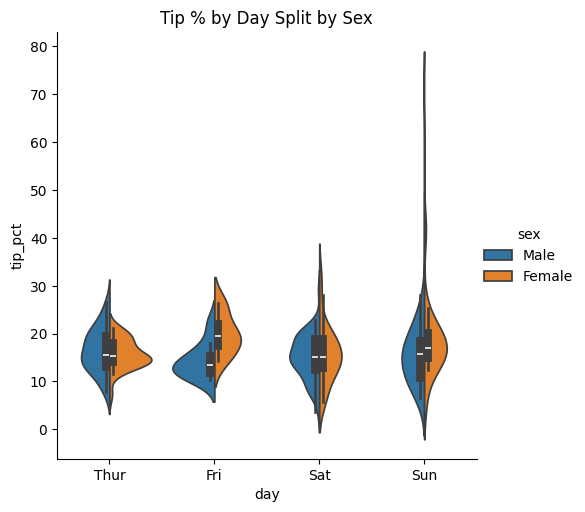

In [10]:
sns.catplot(
    data=tips,
    x="day",
    y="tip_pct",
    hue="sex",
    kind="violin",
    split=True
)
plt.title("Tip % by Day Split by Sex")


This shows interaction, not isolated variables.

Step 8 — Write Final Business Insights

### Key Insights
1. Tip percentage does/does not significantly increase with bill size.
2. Dinner service shows higher tipping variance than lunch, indicating less predictable behavior.
3. Smokers / non-smokers show clear difference / no meaningful difference in tipping habits.
4. One specific day or customer segment shows the most generous tipping percentage consistently.


### Write a 5-sentence executive summary explaining:
- Which group tips best
- Which group tips worst
- Whether tipping behavior is price-dependent
- Whether any segment is unstable (high variability)
- One actionable recommendation for a restaurant manager


Customers dining at Dinner generally demonstrate the highest tip percentages, while Lunch tends to show lower tipping behavior. Smokers show more variability and generally lower tip percentages compared to non-smokers, making them the least consistent tippers. Tipping behavior is not strongly price-dependent; higher total bills do not reliably translate into higher tip percentages. The most unstable segment is the smoker group during dinner service, showing wide variation and less predictable tipping patterns. A practical recommendation is to encourage servers to focus on providing better engagement and service prompts during dinner shifts, where tip percentages are higher and improvements yield greater revenue impact.